In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import math
import sklearn.metrics as mt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2021-09-20 05:00:18.600890: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
data =pd.read_csv(path)

In [3]:
data.columns = ['month','average']

In [4]:
data.drop([114],inplace = True)

In [5]:
data.set_index('month',inplace = True)

In [6]:
scaler = MinMaxScaler(feature_range = (0,1))
y_new = scaler.fit_transform(data)

In [7]:
y_train, y_test = train_test_split(y_new, test_size=0.33,random_state = 42)


In [8]:
def create_dataset(S, look_back=1):
    dataX, dataY = [], []
    for i in range(len(S)-look_back-1):
        a = S[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(S[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
        

In [9]:
look_back = 1
trainX, trainY = create_dataset(y_train, look_back)
testX, testY = create_dataset(y_test, look_back)


In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
model  =  keras.Sequential()
model.add(layers.LSTM(units = 100,activation = 'relu',input_shape = (1,1)))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2,validation_data=(testX,testY))

2021-09-20 05:00:22.385253: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-20 05:00:22.388543: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-20 05:00:22.434787: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-20 05:00:22.435402: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-20 05:00:22.435458: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-20 05:00:22.459210: I tensorflow/stream_executor/platform/def

Epoch 1/100


2021-09-20 05:00:25.367086: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-20 05:00:26.082007: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


74/74 - 2s - loss: 0.2772 - val_loss: 0.1539
Epoch 2/100
74/74 - 0s - loss: 0.1374 - val_loss: 0.0963
Epoch 3/100
74/74 - 0s - loss: 0.0939 - val_loss: 0.0939
Epoch 4/100
74/74 - 0s - loss: 0.0905 - val_loss: 0.0934
Epoch 5/100
74/74 - 0s - loss: 0.0895 - val_loss: 0.0937
Epoch 6/100
74/74 - 0s - loss: 0.0894 - val_loss: 0.0924
Epoch 7/100
74/74 - 0s - loss: 0.0880 - val_loss: 0.0920
Epoch 8/100
74/74 - 0s - loss: 0.0886 - val_loss: 0.0896
Epoch 9/100
74/74 - 0s - loss: 0.0874 - val_loss: 0.0900
Epoch 10/100
74/74 - 0s - loss: 0.0881 - val_loss: 0.0896
Epoch 11/100
74/74 - 0s - loss: 0.0871 - val_loss: 0.0872
Epoch 12/100
74/74 - 0s - loss: 0.0867 - val_loss: 0.0881
Epoch 13/100
74/74 - 0s - loss: 0.0867 - val_loss: 0.0876
Epoch 14/100
74/74 - 0s - loss: 0.0865 - val_loss: 0.0867
Epoch 15/100
74/74 - 0s - loss: 0.0870 - val_loss: 0.0861
Epoch 16/100
74/74 - 0s - loss: 0.0859 - val_loss: 0.0874
Epoch 17/100
74/74 - 0s - loss: 0.0870 - val_loss: 0.0888
Epoch 18/100
74/74 - 0s - loss: 0.0

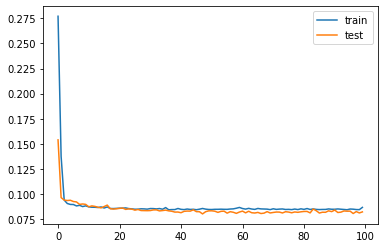

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()